<a href="https://colab.research.google.com/github/SkyyRon/Breast-Cancer-Detection/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> IMPORTS




In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import math
%matplotlib inline

In [4]:
raw_df = pd.read_csv('breast-cancer.csv')
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
raw_df.info()

#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


> first we will DROP IRRELEVANTR COLUMNS : we dont need index here


In [6]:
raw_df = raw_df.drop('id', axis=1)


In [7]:
raw_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




> EDA



In [8]:
raw_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
fig = px.bar(raw_df, x='diagnosis', title='Diagnosis Distribution', width=600, height=400)
fig.show()

In [10]:
px.histogram(data_frame=raw_df,x=raw_df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'], width=500, height=400)


In [11]:
px.histogram(data_frame=raw_df,x=raw_df.texture_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'], width=500, height=400)


In [12]:
px.histogram(data_frame=raw_df,x=raw_df.compactness_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'], width=500, height=400)


In [13]:
px.scatter(data_frame=raw_df,x='radius_se',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [14]:
px.scatter(data_frame=raw_df,x='area_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [15]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=["Smoothness Mean", "Smoothness SE", "Smoothness Worst"])

# Histogram for smoothness_mean
fig.add_trace(go.Histogram(x=raw_df['smoothness_mean'], name="Smoothness Mean"), row=1, col=1)

# Histogram for smoothness_se
fig.add_trace(go.Histogram(x=raw_df['smoothness_se'], name="Smoothness SE"), row=1, col=2)

# Histogram for smoothness_worst
fig.add_trace(go.Histogram(x=raw_df['smoothness_worst'], name="Smoothness Worst"), row=1, col=3)

# Update layout
fig.update_layout(title_text="Comparison of Smoothness Metrics", showlegend=False, width=1000, height=400)

fig.show()


In [16]:
fig = px.histogram(raw_df, x="smoothness_worst", color="diagnosis",
                   color_discrete_sequence=['#A865C9', '#f6abb6'],
                   title="Distribution of Worst Smoothness by Diagnosis",
                   barmode='overlay', opacity=0.6)
fig.show()

In [17]:
fig = px.histogram(raw_df, x="area_worst", color="diagnosis",
                   color_discrete_sequence=['#A865C9', '#f6abb6'],
                   title="Distribution of Worst Smoothness by Diagnosis",
                   barmode='overlay', opacity=0.6)
fig.show()



> ENCODE THE TARGET COLUMN



In [18]:
raw_df['diagnosis'] = (raw_df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [19]:
corr = raw_df.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413




> Removing highly correlated features



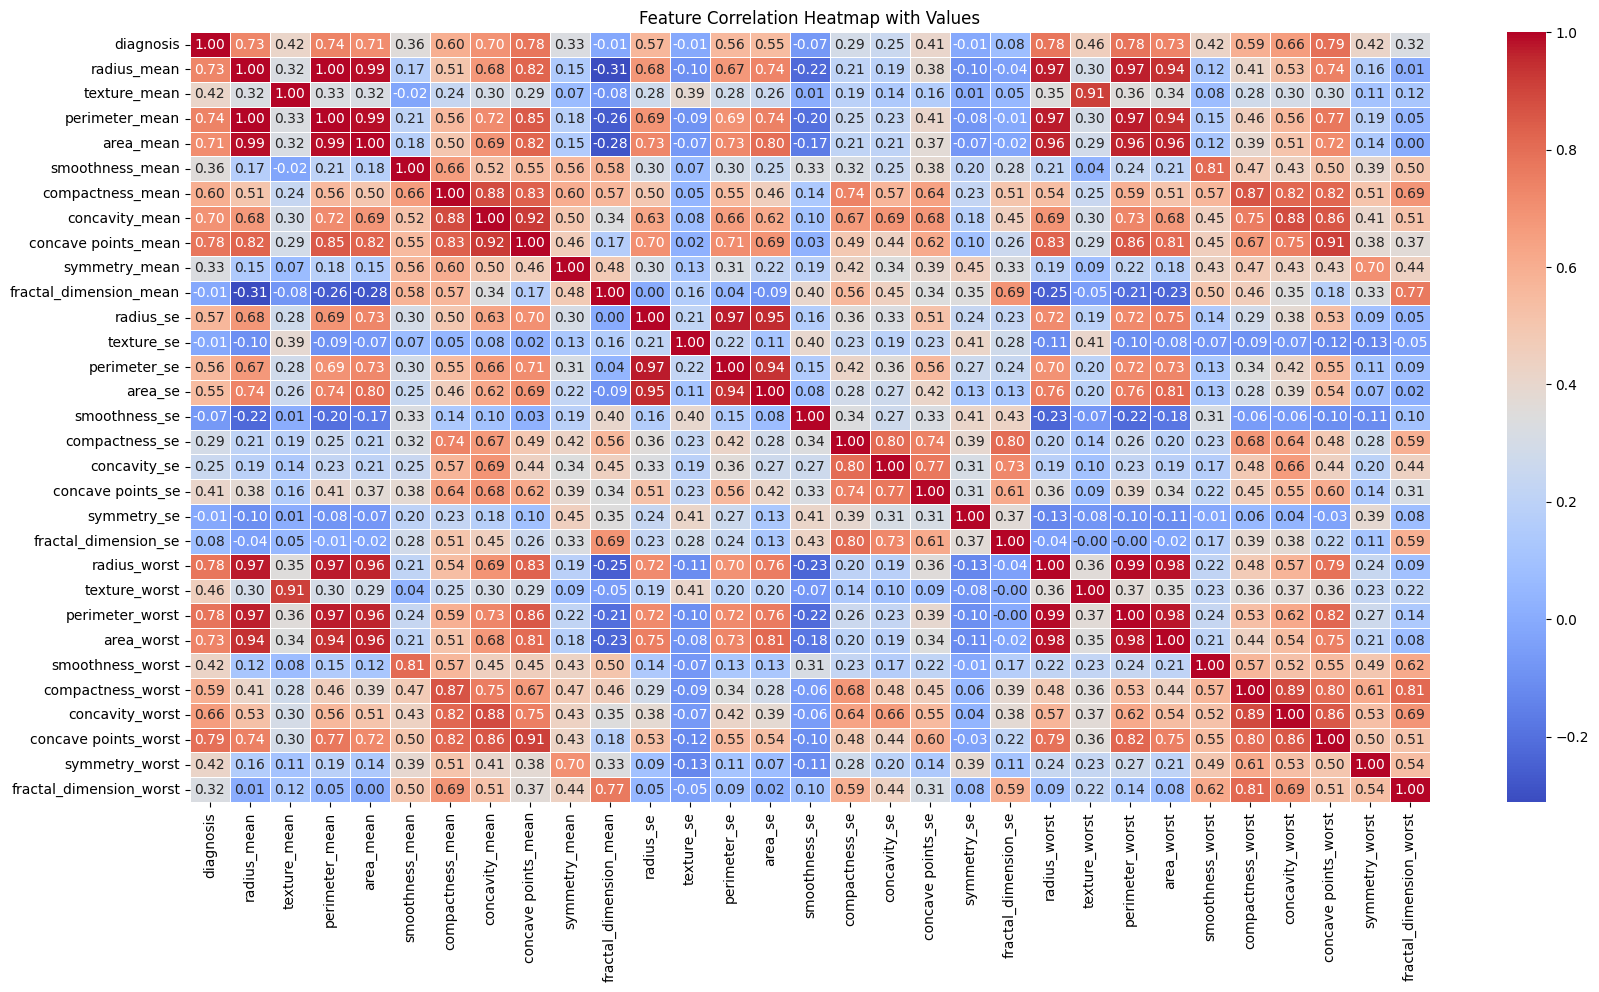

In [20]:
plt.figure(figsize=(20,10))  # Set figure size
corr_matrix = raw_df.corr()  # Compute correlation matrix

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap with Values")
plt.show()



> remove multicollinearity



In [21]:
# feature selection
corr_matrix = raw_df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

raw_df = raw_df.drop(to_drop, axis=1)

print(raw_df.shape[1])

23


In [22]:
raw_df.head(5)

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
raw_df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')



> DATA PREPROCESSING



In [24]:
raw_df.columns


Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

input_cols = list(raw_df.columns)[1:]
target_col = 'diagnosis'

# Split into training (70%) and temp (30%)
train_df, temp_df = train_test_split(raw_df, test_size=0.3, random_state=42)
# Split temp into validation (15%) and test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()



In [26]:
print(f"Train Data: {train_df.shape}")
print(f"Validation Data: {val_df.shape}")
print(f"Test Data: {test_df.shape}")

Train Data: (398, 23)
Validation Data: (85, 23)
Test Data: (86, 23)


In [27]:
numeric_cols = input_cols

In [28]:
#scale numeric inputs
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.fit_transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [29]:
#select the cols to be used for training/prediction
X_train = train_inputs[numeric_cols ]
X_val = val_inputs[numeric_cols ]
X_test = test_inputs[numeric_cols ]



> MODEL TRAINING

1. Logistic Regression
2. Deision Tree and Random Search optimizer
3. Random Forest
4. XGBoosting



In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, train_targets)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_preds = log_reg.predict(X_train)
val_preds = log_reg.predict(X_val)

train_accuracy = accuracy_score(train_targets, train_preds)
val_accuracy = accuracy_score(val_targets, val_preds)

train_accuracy, val_accuracy

(0.9597989949748744, 0.9411764705882353)

In [32]:
confusion_matrix(val_targets, val_preds, normalize='true')
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.97      0.89      0.93        37

    accuracy                           0.94        85
   macro avg       0.95      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



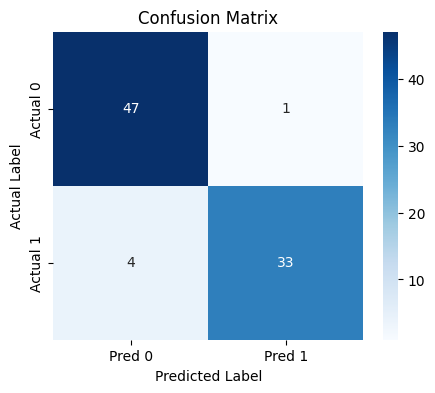

In [33]:
y_pred = log_reg.predict(test_inputs)  # Model predictions
cm = confusion_matrix(val_targets, val_preds)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()



> DECISION TREE MODEL



In [34]:
from sklearn.tree import DecisionTreeClassifier
import joblib

tree_model = DecisionTreeClassifier(random_state = 42)

train_preds = tree_model.fit(X_train, train_targets)
val_preds = tree_model.fit(X_val, val_targets)

train_accuracy = tree_model.score(X_train, train_targets)
val_accuracy =  tree_model.score(X_val, val_targets)

train_accuracy, val_accuracy

(0.9045226130653267, 1.0)

In [35]:
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance' : tree_model.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
15,area_worst,0.774807
19,concave points_worst,0.178351
21,fractal_dimension_worst,0.046842
2,compactness_mean,0.000000
0,texture_mean,0.000000
1,smoothness_mean,0.000000
5,fractal_dimension_mean,0.000000
4,symmetry_mean,0.000000
3,concave points_mean,0.000000
6,texture_se,0.000000


cv=5 (Cross-Validation)  
cv stands for cross-validation folds.  
cv=5 means 5-fold cross-validation.  
The dataset is split into 5 equal parts (folds):  
4 folds are used for training.  
1 fold is used for validation.  
This process repeats 5 times, with each fold used once as the validation set.

In [36]:
# Define range of max_depth values
max_depth_values = range(1, 21)  # Try depths from 1 to 20

# Store results
results = []

for depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    train_error = (1 - model.score(train_inputs, train_targets)) * 1000
    val_error = (1 - model.score(val_inputs, val_targets)) * 1000

    results.append({'max_depth': depth, 'train_error': train_error, 'val_error': val_error})

# Convert results to DataFrame
error_df = pd.DataFrame(results)

# Display results
print(error_df)

    max_depth  train_error  val_error
0           1    75.376884  82.352941
1           2    52.763819  70.588235
2           3    32.663317  47.058824
3           4     7.537688  35.294118
4           5     7.537688  35.294118
5           6     2.512563  70.588235
6           7     2.512563  70.588235
7           8     0.000000  82.352941
8           9     0.000000  82.352941
9          10     0.000000  82.352941
10         11     0.000000  82.352941
11         12     0.000000  82.352941
12         13     0.000000  82.352941
13         14     0.000000  82.352941
14         15     0.000000  82.352941
15         16     0.000000  82.352941
16         17     0.000000  82.352941
17         18     0.000000  82.352941
18         19     0.000000  82.352941
19         20     0.000000  82.352941


In [37]:
# Define range of min_samples_split values
min_samples_split_values = range(2, 21)  # Trying values from 2 to 20

# Store results
results = []

for min_split in min_samples_split_values:
    model = DecisionTreeClassifier(min_samples_split=min_split, random_state=42)
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    train_error = (1 - model.score(train_inputs, train_targets)) * 1000
    val_error = (1 - model.score(val_inputs, val_targets)) * 1000

    results.append({'min_samples_split': min_split, 'train_error': round(train_error, 2), 'val_error': round(val_error, 2)})

# Convert results to DataFrame
error_df = pd.DataFrame(results)

# Display results
print(error_df)


    min_samples_split  train_error  val_error
0                   2         0.00      82.35
1                   3         0.00      82.35
2                   4         0.00      82.35
3                   5         0.00      82.35
4                   6         0.00      82.35
5                   7        10.05      70.59
6                   8        10.05      70.59
7                   9        10.05      70.59
8                  10        17.59      58.82
9                  11        17.59      58.82
10                 12        17.59      58.82
11                 13        17.59      58.82
12                 14        32.66      70.59
13                 15        42.71     105.88
14                 16        42.71     105.88
15                 17        42.71     105.88
16                 18        42.71     105.88
17                 19        42.71     105.88
18                 20        42.71     105.88


In [38]:
# Define range of min_samples_leaf values
min_samples_leaf_values = range(1, 21)  # Trying values from 1 to 20

# Store results
results = []

for min_leaf in min_samples_leaf_values:
    model = DecisionTreeClassifier(min_samples_leaf=min_leaf, random_state=42)
    model.fit(train_inputs, train_targets)

    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)

    train_error = (1 - model.score(train_inputs, train_targets)) * 1000
    val_error = (1 - model.score(val_inputs, val_targets)) * 1000

    results.append({'min_samples_leaf': min_leaf, 'train_error': round(train_error, 2), 'val_error': round(val_error, 2)})

# Convert results to DataFrame
error_df = pd.DataFrame(results)

# Display results
print(error_df)


    min_samples_leaf  train_error  val_error
0                  1         0.00      82.35
1                  2         5.03      23.53
2                  3         5.03      35.29
3                  4        15.08      23.53
4                  5        25.13      23.53
5                  6        30.15      23.53
6                  7        47.74      35.29
7                  8        50.25      70.59
8                  9        50.25      70.59
9                 10        55.28      82.35
10                11        55.28      82.35
11                12        55.28      82.35
12                13        55.28      82.35
13                14        60.30      94.12
14                15        50.25      58.82
15                16        50.25      58.82
16                17        75.38      82.35
17                18        75.38      82.35
18                19        75.38      82.35
19                20        75.38      82.35


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
from scipy.stats import randint

parameters = {
    'max_depth': [4],             # 4-5
    'min_samples_split': [13],     # 10-13
    'min_samples_leaf': [5],      # 3-5
    'criterion': ['gini', 'entropy'],
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(tree_model, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, train_targets)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4],
                         'min_samples_leaf': [5], 'min_samples_split': [13],
                         'splitter': ['best', 'random']},
             verbose=1)

In [40]:
 # Best hyperparameters
print("Best Parameters:", grid_search_dt.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 13, 'splitter': 'best'}


In [41]:
grid_search_dt.best_score_

np.float64(0.9372151898734176)

In [42]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, min_samples_leaf= 6, min_samples_split= 2, splitter= 'random')
dtc.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, splitter='random')

In [43]:


train_preds = dtc.predict(X_train)
val_preds = dtc.predict(X_val)

train_accuracy = accuracy_score(train_targets, train_preds)
val_accuracy = accuracy_score(val_targets, val_preds)

train_accuracy, val_accuracy


(0.9170854271356784, 0.9176470588235294)

In [44]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dtc, train_inputs, train_targets, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean() * 100)


Cross-Validation Accuracy Scores: [0.9125     0.9125     0.975      0.94936709 0.89873418]
Mean CV Accuracy: 92.9620253164557




> Random Forest


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state=42)




In [46]:
%%time
rf.fit(X_train, train_targets)
rf.score(X_train, train_targets), rf.score(X_val, val_targets)

CPU times: user 414 ms, sys: 27.7 ms, total: 442 ms
Wall time: 395 ms


(1.0, 0.9647058823529412)

In [47]:
confusion_matrix(val_targets, val_preds, normalize='true')
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

           0       0.96      0.90      0.92        48
           1       0.88      0.95      0.91        37

    accuracy                           0.92        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.92      0.92      0.92        85



In [65]:
# Predict on the test set
test_preds = rf.predict(X_test)

In [66]:
confusion_matrix(test_targets, test_preds, normalize='true')
print(classification_report(test_targets, test_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.96      0.88      0.92        26

    accuracy                           0.95        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.95      0.95      0.95        86



In [52]:
import xgboost as xgb
print(xgb.__version__)


2.1.4


In [59]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    max_depth=grid_search_dt.best_params_["max_depth"],
    min_child_weight=grid_search_dt.best_params_["min_samples_leaf"],
    learning_rate=0.01,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='binary:logistic'  # For binary classification
)


In [60]:
%%time
xgb_model.fit(X_train, train_targets)
xgb_model.score(X_train, train_targets), rf.score(X_val, val_targets)

CPU times: user 2.84 s, sys: 3.91 ms, total: 2.84 s
Wall time: 4.05 s


(0.9849246231155779, 0.9647058823529412)

In [61]:
confusion_matrix(val_targets, val_preds, normalize='true')
print(classification_report(val_targets, val_preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.97      0.95      0.96        37

    accuracy                           0.96        85
   macro avg       0.97      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



TEST THE DATA

In [63]:
# Predict on the test set
test_preds = xgb_model.predict(X_test)

In [64]:
confusion_matrix(test_targets, test_preds, normalize='true')
print(classification_report(test_targets, test_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.92      0.92      0.92        26

    accuracy                           0.95        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.95      0.95      0.95        86

